TASK 1

In [3]:
#Create the data file and import important
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

jump_statistics = pd.read_excel(r'\data_for_CURE2.xlsx')

In [4]:
#Set up the dataframe
jump_statistics = jump_statistics.rename(columns = { jump_statistics.columns[3]: "person_jumping"})
df = jump_statistics


In [5]:
#Set up your x and y training and testing sets
dfX = df.drop (columns = ['person_jumping'])
sy = df.person_jumping

In [6]:
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX,sy)

In [7]:
dfX_train, dfX_test, sy_train, sy_test;

SET UP YOUR LABEL ENCODER

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [9]:
le = le.fit(sy_train)
le.classes_

array([1, 2, 3], dtype=int64)

In [10]:
#trasnform your training set into a label encoded one
y_train = le.transform(sy_train)
sy_train, y_train

(47    3
 54    1
 27    1
 99    1
 28    2
      ..
 23    3
 12    2
 17    3
 89    3
 52    2
 Name: person_jumping, Length: 76, dtype: int64,
 array([2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2,
        2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1,
        2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1,
        2, 0, 2, 1, 0, 2, 1, 2, 2, 1], dtype=int64))

In [11]:
#Wrap your training set into an array
dfX_train.to_numpy()

array([[ 19,  85,  54],
       [ 25,  92,  48],
       [ 21,  83,  55],
       [ 27,  96,  53],
       [ 21,  80,  55],
       [ 22,  89,  49],
       [ 19,  79,  49],
       [ 16,  73,  56],
       [ 16,  99,  54],
       [ 19, 108,  52],
       [ 22,  72,  46],
       [ 19, 106,  45],
       [ 25,  86,  53],
       [ 16,  96,  44],
       [ 25,  74,  56],
       [ 15,  82,  50],
       [ 23, 100,  49],
       [ 24, 107,  52],
       [ 17,  85,  50],
       [ 25,  80,  45],
       [ 16,  77,  47],
       [ 26, 102,  51],
       [ 24, 101,  45],
       [ 18, 103,  47],
       [ 17, 107,  50],
       [ 26,  80,  55],
       [ 19,  80,  53],
       [ 24,  98,  47],
       [ 24,  94,  56],
       [ 25,  83,  53],
       [ 23, 110,  52],
       [ 16, 109,  53],
       [ 19,  76,  45],
       [ 28, 108,  52],
       [ 16,  94,  45],
       [ 27, 104,  49],
       [ 28,  76,  56],
       [ 16,  85,  54],
       [ 26,  89,  49],
       [ 23,  84,  44],
       [ 19,  87,  53],
       [ 29, 104

In [12]:
#Develop your knn classifier
n1= preprocessing.MinMaxScaler()
n1= n1.fit(dfX_train.to_numpy())

X_train = n1.transform(dfX_train.to_numpy())


In [13]:
X_train.shape

(76, 3)

In [14]:
#Create your knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=7)

knn = knn.fit(X_train, y_train)

In [15]:
#Set up your test values
y_test = le.transform(sy_test.to_numpy())


In [16]:
#Set up your test values
X_test = n1.transform(dfX_test.to_numpy())


In [17]:
#Retrieve your model accuraccy for a given k-value
knn.score(X_test, y_test)

0.2692307692307692

In [18]:
knn.score(X_train, y_train)

0.5526315789473685

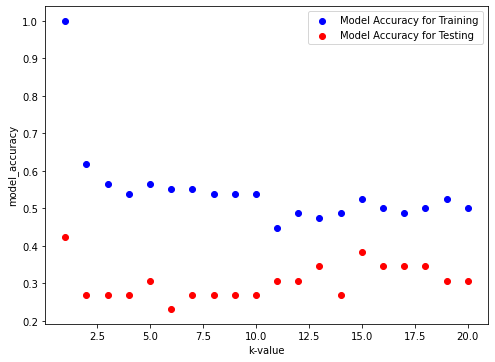

In [19]:
#Create a scatterplot iterating through different k-values
fig, axs = plt.subplots(   figsize =(26, 5))
axs2 = plt.subplot2grid(  shape= (1,4), loc = (0,0))

plt.tight_layout()
axs2.set_xlabel ('k-value')
axs2.set_ylabel ('model_accuracy')


k = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
tst = []
trn = []
for i in range(1,21):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    train = knn.score(X_train, y_train)
    test = knn.score(X_test, y_test)
    
    tst.append(test)
    trn.append(train)

tst2 =np.array(tst)
trn2 = np.array(trn)
axs2.scatter(k,trn2, color="blue", label = 'Model Accuracy for Training')
axs2.scatter(k,tst2, color='red', label = 'Model Accuracy for Testing')  
axs2.legend()


In [20]:
#Set it up again using Standard Scaler instead of min/max
n2= preprocessing.StandardScaler()
n2= n2.fit(dfX_train.to_numpy())

X_train = n2.transform(dfX_train.to_numpy())


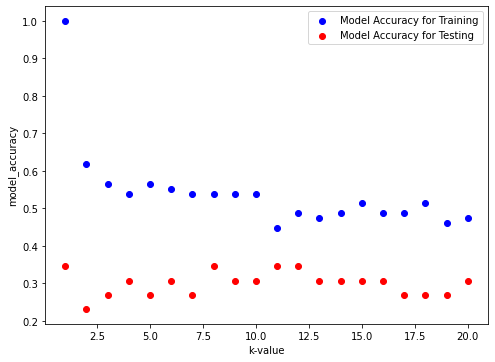

In [21]:
#Plot the standard scaler data
fig, axs = plt.subplots(   figsize =(26, 5))
axs2 = plt.subplot2grid(  shape= (1,4), loc = (0,0))

plt.tight_layout()
axs2.set_xlabel ('k-value')
axs2.set_ylabel ('model_accuracy')


k = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
tst = []
trn = []
for i in range(1,21):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    train = knn.score(X_train, y_train)
    test = knn.score(X_test, y_test)
    
    tst.append(test)
    trn.append(train)

tst2 =np.array(tst)
trn2 = np.array(trn)
axs2.scatter(k,trn2, color="blue", label = 'Model Accuracy for Training')
axs2.scatter(k,tst2, color='red', label = 'Model Accuracy for Testing')  
axs2.legend()

Selected Standard Scalar and k value of 8

In [39]:
#Set to standard scalar
n2= preprocessing.StandardScaler()
n2= n2.fit(dfX_train.to_numpy())

X_train = n2.transform(dfX_train.to_numpy())

#Set the k value to 8 and fit it
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=8)

knn = knn.fit(X_train, y_train)



#Create and print the confusion matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_train,y_pred)
cm



array([[19,  2,  6],
       [ 9,  9,  4],
       [ 7,  7, 13]], dtype=int64)

In [42]:
#Set to standard scalar
n2= preprocessing.StandardScaler()
n2= n2.fit(dfX_train.to_numpy())

X_train = n2.transform(dfX_train.to_numpy())

#Set the k value to 8 and fit it
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=8)

knn = knn.fit(X_train, y_train)


In [43]:
#Set y_test
y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

(69     1
 4      1
 50     3
 97     2
 95     3
 7      1
 40     2
 76     2
 88     2
 55     2
 25     2
 101    3
 38     3
 14     2
 1      1
 8      3
 72     1
 91     2
 22     2
 75     1
 56     3
 73     2
 74     3
 49     2
 64     2
 84     1
 Name: person_jumping, dtype: int64,
 array([0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1,
        2, 1, 1, 0], dtype=int64))

In [45]:

X_test = n2.transform(dfX_test.to_numpy())
dfX_test, X_test

(     Recorded  Jump Height (in)  Recorded Jump length (in)  \
 69                           24                         75   
 4                            17                         77   
 50                           22                         88   
 97                           24                         82   
 95                           25                        104   
 7                            18                         78   
 40                           17                        101   
 76                           18                         85   
 88                           22                         74   
 55                           22                         83   
 25                           18                         87   
 101                          19                         73   
 38                           18                         95   
 14                           23                         59   
 1                            18                       

In [50]:
#predict the class
knn.predict(X_test)

array([0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 2, 2, 1], dtype=int64)

In [51]:
y_test

array([0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 0], dtype=int64)

In [53]:
#Calculate the model accuracy
#Gives the fraction of intances correctly predicted
knn.score(X_test, y_test)

0.2692307692307692

In [54]:
knn.score(X_train, y_train)

0.5394736842105263

In [56]:
#creates a mini array of 3 jump inputs
new_example_rawdata = np.array([[23,83,45]])
X_new = n2.transform(new_example_rawdata)
X_new

array([[ 0.3 , -0.73, -1.49]])

In [57]:
#predict the class given 3 jump inputs
knn.predict(X_new)

array([0], dtype=int64)

In [59]:
le.inverse_transform(knn.predict(X_new))

array([1], dtype=int64)